**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Domingo 03 de octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Eduardo Madrigal Marín
- Gabriel Vargas Rodríguez





___

# Parte 1  -  Ejercicio
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (Concrete_Data - USAR)-
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: **Cement**.
- Debe comentar ampliamente su código
- El profesor hará el rol del **cliente** por si tiene consultas sobre el conjunto de datos.


### Sobre este dataset 

Name -- Data Type -- Measurement -- Description

- id -- quantitative -- integer
- Cement -- quantitative -- kg in a m3 mixture 
- Blast Furnace Slag -- quantitative -- kg in a m3 mixture 
- Fly Ash -- quantitative -- kg in a m3 mixture 
- Water -- quantitative -- kg in a m3 mixture 
- Superplasticizer -- quantitative -- kg in a m3 mixture 
- Coarse Aggregate -- quantitative -- kg in a m3 mixture 
- Fine Aggregate -- quantitative -- kg in a m3 mixture 
- Age -- quantitative -- Day (1~365) 
- Concrete compressive strength -- quantitative -- MPa 


### 1 (10 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# loads file as a DataFrame
data = pd.read_csv('Concrete_Data - USAR.csv', header = 0, sep=';') # index_col = 0
print(data.head(5)) # shows first 5 registers to check if everything is loaded correctly

   id  cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   1   540.0    0.0     0.0  162.0            2500.0           1040.0   
1   2   540.0    0.0     0.0  162.0               2.5           1055.0   
2   3   332.5  142.5     0.0  228.0               0.0            932.0   
3   4   332.5  142.5     0.0  228.0               0.0            932.0   
4   5   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  


In [3]:
data.describe()

,id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1008.000000,1030.000000,1030.000000,1030.000000
mean,515.500000,281.167864,73.895825,54.188350,181.567282,119.511165,973.067163,773.580485,45.662136,35.817961
std,297.479691,104.506364,86.279342,63.997004,21.354219,3017.404502,77.667244,80.175980,63.169912,16.705742
min,1.000000,102.000000,0.000000,0.000000,121.800000,-100.000000,801.000000,594.000000,1.000000,2.330000
25%,258.250000,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,515.500000,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,772.750000,350.000000,142.950000,118.300000,192.000000,10.300000,1029.400000,824.000000,56.000000,46.135000
max,1030.000000,540.000000,359.400000,200.100000,247.000000,96000.000000,1145.000000,992.600000,365.000000,82.600000


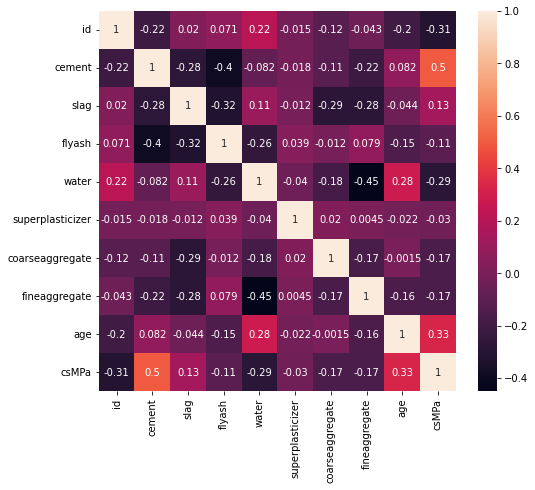

In [4]:
plt.subplots(figsize=(8,7))
sn.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
# null values
print(data['coarseaggregate'].isnull().sum())
data.isnull().mean() 

22


id                  0.000000
cement              0.000000
slag                0.000000
flyash              0.000000
water               0.000000
superplasticizer    0.000000
coarseaggregate     0.021359
fineaggregate       0.000000
age                 0.000000
csMPa               0.000000
dtype: float64

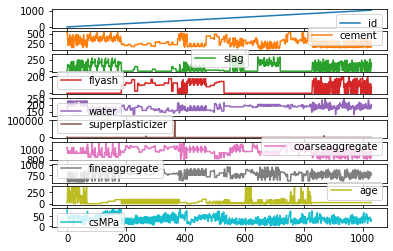

In [6]:
data.plot(subplots=True)
plt.show()

Valores únicos en id: 1030
Valores (min, max) en id: (1, 1030)


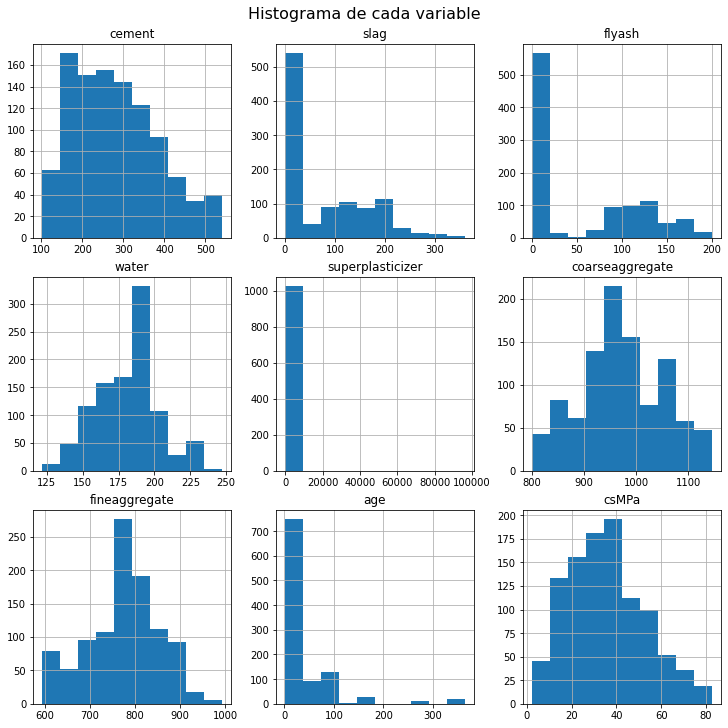

In [7]:
# no se grafica id pues se sabe que todos los valores son únicos y seguidos
print(f'Valores únicos en id: {data["id"].nunique()}')
print(f'Valores (min, max) en id: ({data["id"].min()}, {data["id"].max()})')

fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(10,10)) 
fig.suptitle('Histograma de cada variable', fontsize=16)
d = 1
for i in range(3):
    for j in range(3):
        axs[i,j].set_title(data.columns[d])
        data.iloc[:, d].hist(ax=axs[i,j])
        d += 1
plt.show()

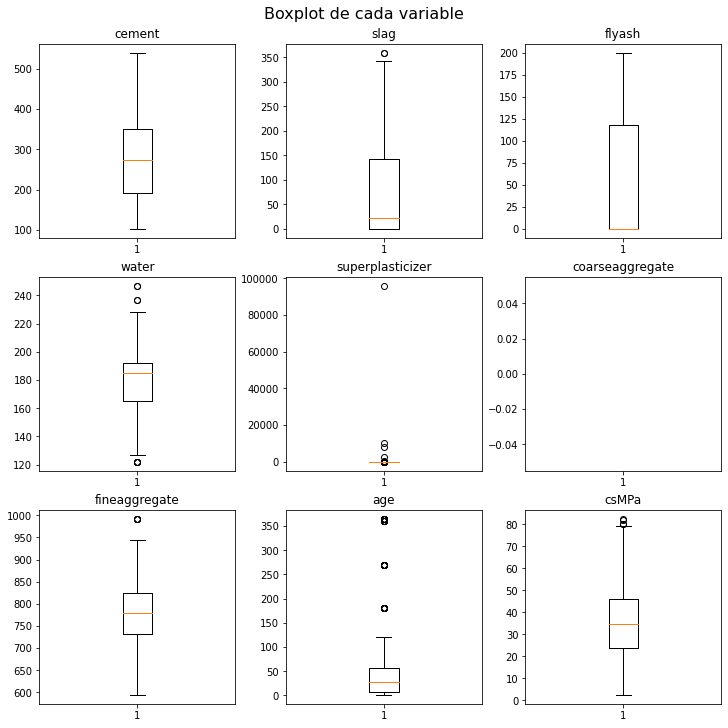

In [8]:
fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(10,10)) 
fig.suptitle('Boxplot de cada variable', fontsize=16)
d=1
for i in range(3):
    for j in range(3):
        axs[i,j].set_title(data.columns[d])
        axs[i,j].boxplot(data.iloc[:,d])
        d += 1

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [9]:
from sklearn.model_selection import train_test_split

Y = pd.DataFrame(data['cement'])
X = data.drop(columns=['cement'])

X_trainVal, X_test, Y_trainVal, Y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    shuffle=True,
                                                    random_state=42 #seed
                                                    )

print(X_trainVal.shape, Y_trainVal.shape)
print(X_test.shape, Y_test.shape)
print('\n\nX_trainVal:')
X_trainVal.head(5)

(721, 9) (721, 1)
(309, 9) (309, 1)


X_trainVal:


,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
196,197,0.0,100.5,165.6,7.5,1006.4,905.9,28,25.72
631,632,0.0,0.0,184.0,0.0,1063.0,783.0,7,17.54
81,82,212.5,0.0,155.7,14.3,852.1,880.4,3,25.20
526,527,19.0,141.0,154.0,10.9,942.0,801.0,3,23.64
830,831,190.0,148.0,179.0,19.0,838.0,741.0,28,33.76


In [10]:
print('X_test:')
X_test.head(5)

X_test:


,id,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
31,32,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,110,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
136,137,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
88,89,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
918,919,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


In [11]:
print('Y_trainVal:')
Y_trainVal.head(5)

Y_trainVal:


,cement
196,194.7
631,325.0
81,318.8
526,359.0
830,162.0


In [12]:
print('Y_test:')
Y_test.head(5)

Y_test:


,cement
31,266.0
109,362.6
136,389.9
88,362.6
918,145.0


### 3  (15 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

### 4 (10 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- ¿Qué hará con el atributo denominado: "Id"?
- Comente sus conclusiones.


### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'Concrete_DataPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


### 1.6 (20 puntos)
Presente e implemente un diseño experimental que incluya:
- Cuatro algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Otro el método de regresión RIDGE.
    - Usted eligirá dos métodos más de regresión, que no sean de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para los otros dos métodos, debe usar ten-cross-validation para seleccionar **al menos un hiperparámetro**.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección). Recuerde aspectos como analizar promedios y desviaciones estándar.
    
**Nota:** Para cada uno de los dos algoritmos seleccionados (no el OLSR) explique los parámetros que recibe. 
    

### 1.7 (15 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Si tuviera que recomendar un método a usar con este dataset ¿cuál sería de los comparados y por qué?
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Temas por grupo (20 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume y explica las técnicas asignadas. 
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 12 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ). 

In [13]:
# 1. Constant features
# 2. Quasi-constant features